In [1]:
import sys
import os
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [120]:
alpha = 6.0
beta = 6.0
gamma = 0.05
sigma = 2.0

In [132]:
N_PATHS = 5000
tspan = np.linspace(0.0, 6.0 * np.pi, 600)

In [133]:
paths = np.empty((N_PATHS, len(tspan)))

In [134]:
np.random.seed(42)
for i in range(N_PATHS):
    paths[i, :] = sdeint.itoint(f=lambda x, t: -alpha * (np.sin(x)) + beta * np.sin(t) - gamma * x, G=lambda x, t: sigma, y0=np.random.normal(scale=3), tspan=tspan).flatten()

In [135]:
train_paths, test_paths = train_test_split(paths, shuffle=True, random_state=42, train_size=0.8)

In [136]:
np.amax(np.abs(train_paths.flatten()))

27.361162601919897

(-25.0, 25.0)

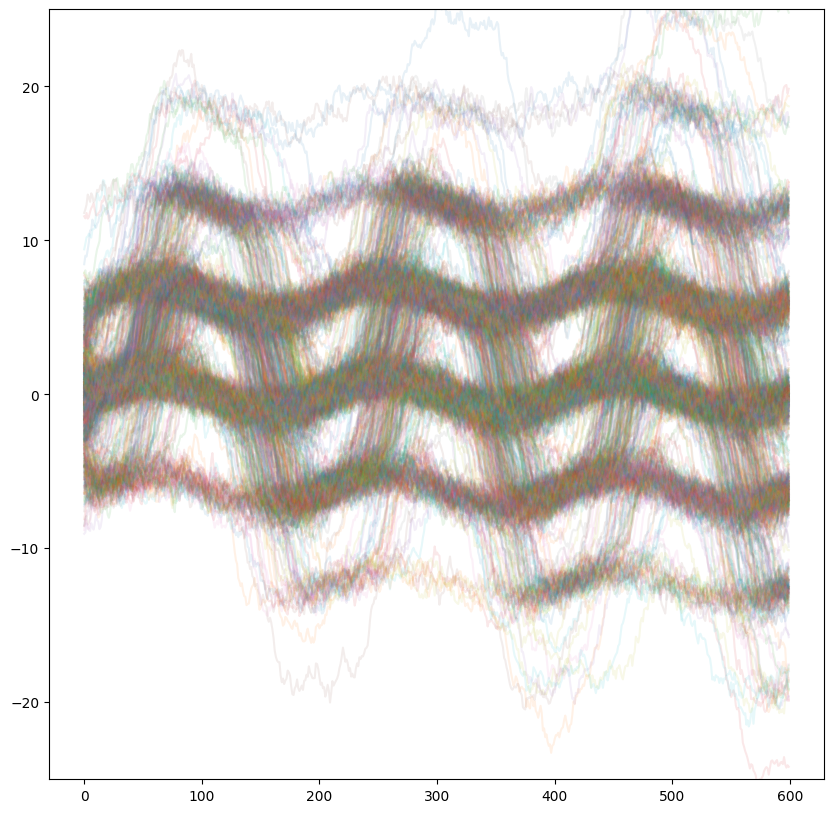

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(1000):
    ax.plot(train_paths[i, :], alpha=0.1)
ax.set_ylim(-25, 25)

In [141]:
np.save("./sit_train_samples.npy", train_paths)
np.save("./sit_test_samples.npy", test_paths)
np.save("./sit_tspan.npy", tspan)

In [142]:
bms = np.empty((N_PATHS // 5, len(tspan)))
np.random.seed(2022)
for i in range(bms.shape[0]):
    bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()

In [143]:
np.save("./sit_test_bms.npy", bms)

In [144]:
train_bms = np.empty((len(train_paths), len(tspan)))
for i in range(train_bms.shape[0]):
    train_bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()
    


In [145]:
np.save("./sit_train_bms.npy", train_bms)

In [139]:
len(tspan)

600

In [146]:
np.load("./sit_test_bms.npy").shape

(1000, 600)